# Image Flip Layer


> Mirror facing mirror - nowhere else.
>
> – Ikkyu  
  
In this tutorial we will create our first custom Keras layer which flips the input images horizontal.


## Getting ready

In [1]:
import numpy as np
import os
import tensorflow as tf

from matplotlib import pyplot as plt
from IPython import display

image_paths = []
image_paths.append('./images/espresso_1.jpg')
image_paths.append('./images/espresso_2.jpg')


## Preprocessing the images

1. Loading the two image files into PIL format:  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img

2. Converting the PIL image instances into Numpy arrays:  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/img_to_array


In [2]:
image_np_arries = []

for image_path in image_paths:

    image_pil = tf.keras.preprocessing.image.load_img(image_path) #(1)
    image_np_array = tf.keras.preprocessing.image.img_to_array(image_pil) #(2)
    image_np_arries.append(image_np_array)

image_np_array_batch = np.array(image_np_arries)

## The input images

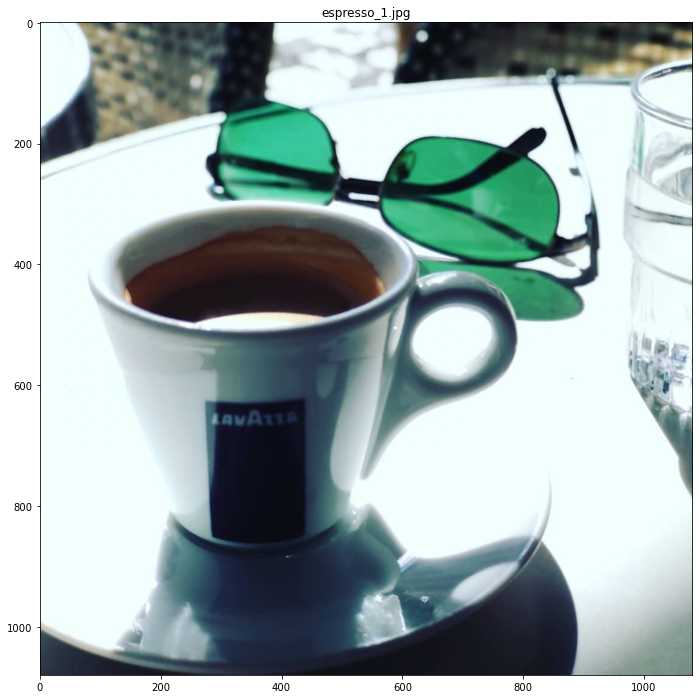

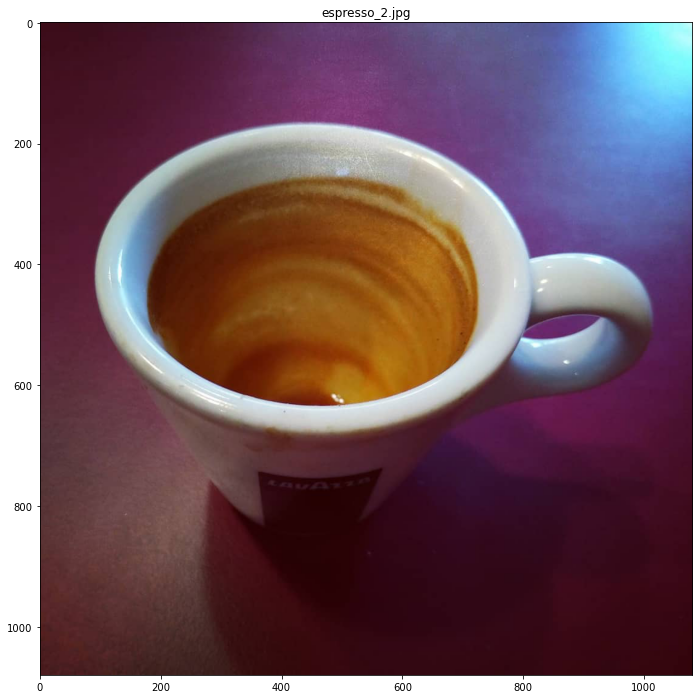

In [3]:
for idx, image_np_array in enumerate(image_np_array_batch):

    plt.figure(figsize=(12,12))
    plt.title(os.path.basename(image_paths[idx]))
    plt.imshow(image_np_array/255.0)

plt.show()

## Our custom Keras layer

For a thorough explanation on custom layers (and models) see:

https://www.tensorflow.org/guide/keras/custom_layers_and_models


In [4]:
class HorizontalFlip(tf.keras.layers.Layer):

  def __init__(self):
    super(HorizontalFlip, self).__init__()

  def call(self, inputs):
    return tf.image.flip_left_right(inputs)
        



## Flipping the images

In [5]:

horizontal_flip = HorizontalFlip()

image_flipped_np_array_batch = horizontal_flip(image_np_array_batch)

## The glorious result


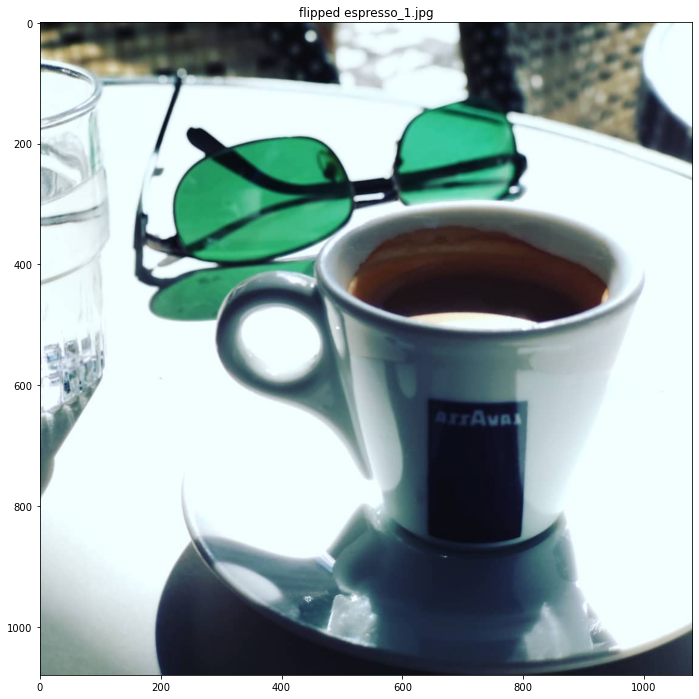

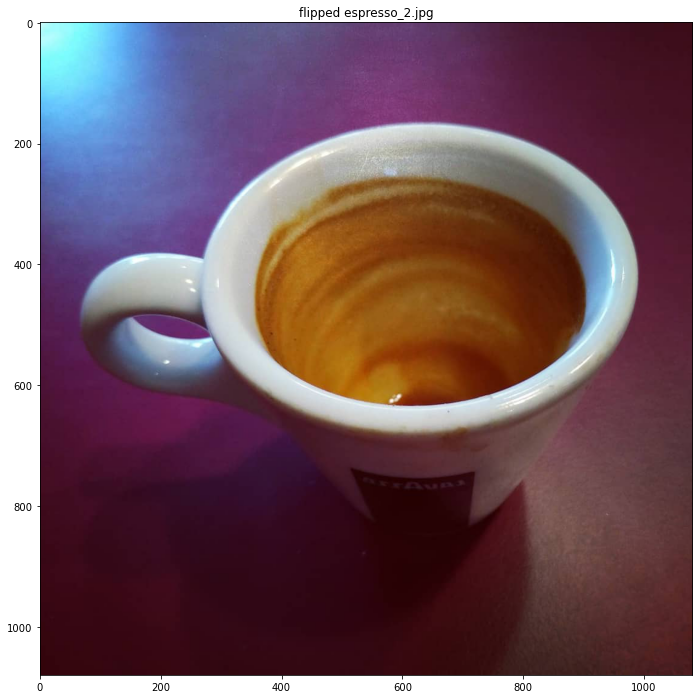

In [6]:
for idx, image_np_array in enumerate(image_flipped_np_array_batch):

    plt.figure(figsize=(12,12))
    plt.title("flipped {}".format(os.path.basename(image_paths[idx])))
    plt.imshow(image_np_array/255.0)

plt.show()
